# Excercise 1.1: One-dimensional Linear Regression

In this exercise the task is to implement linear regression and get to see it work on data. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities. You would like to use this data to help you select which city to expand
to next.

## Excercise 1.1, Part 1: Data visualization

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss. As always, we begin this exercise by import the libraries we will use.


In [2]:
import numpy as np 
import scipy.io #Load matlab files
import pandas as pd
from matplotlib import pyplot as plt

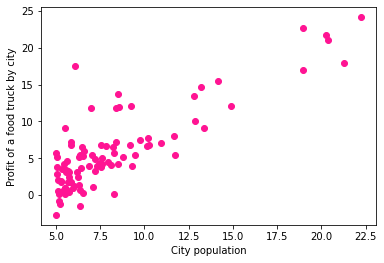

,City population,Profit of a food truck by city
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
#DATA LOADING

data = np.loadtxt('data/ex1data1.txt',delimiter=',', dtype=float)
data = pd.DataFrame(data)
data.columns = ['City population','Profit of a food truck by city']

#DATA VISUALIZATION

#Although it was not asked in the exercise, 
#I decided to add a dataframe plot alongside with the scatter plot of the data

plt.figure()
plt.scatter(data['City population'],data['Profit of a food truck by city'],color='deeppink')
plt.xlabel('City population')
plt.ylabel('Profit of a food truck by city')
plt.show()

data.head(5)

## Exercise 1.1, Part 2: Gradient Descent

The objective of linear regression is to minimize the cost function

<center> $J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2},$ </center>
    
where the hypothesis $h_{\theta}(x)$ is given by 
    
<center> $ h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x_1. $ </center>
 
Recall that the parameters of your model are the θj values. These are
the values you will adjust to minimize cost J(θ). One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update
    
<center> $\theta_{j}:=\theta_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}$ </center>

simultaneously for all $\theta_j$ for all $j$

With each step of gradient descent, your parameters $\theta_j$ come closer to the
optimal values that will achieve the lowest cost $J(\theta)$.

Remark: Because we have a $\theta_0$ parameter, we require an extra bias unit column for $x$ given by $x_0 = 1$
    
Remark 2:
<center>
$\mathrm{X}=\left[\begin{array}{c}-\left(x^{(1)}\right)^{T}- \\ -\left(x^{(2)}\right)^{T}- \\ \vdots \\ -\left(x^{\left(n_{m}\right)}\right)^{T}-\end{array}\right], \quad$ Theta $=\left[\begin{array}{c}\theta_0 \\ \theta_1 \\ \vdots \\ -\left(\theta^{\left(n_{u}\right)}\right)^{T}-\end{array}\right]$
</center>
    

In [4]:
def computeCost(X,Theta,Y):
    m = len(Y)
    return (.5/m)*np.sum(np.square((np.matmul(X,Theta)-Y)))
    
def gradientDescent(X,theta,Y,n_it,a):
    J_history = np.zeros((n_it,1),dtype=float)
    m = len(Y)
    for i in range(n_it):
        theta += -(a/m)*np.sum( np.multiply(X, np.matmul(X,theta)-Y ),axis=0 ).reshape(len(theta),1)
        J_history[i] = computeCost(X,theta,Y)
    return theta, J_history

The exercise asks to check out the value for the cost function given $\theta=(0,0)$ and $\theta=(-1,2)$ which should yield the results, respectively and approximately, of $J(0,0)=32.07$ and $J(-1,2)=54.24$.
.

In [5]:
#Reshape the data in a friendly format
X = data['City population'].to_numpy()
X = X.reshape(len(X),1)
Y = data['Profit of a food truck by city'].to_numpy()
Y = Y.reshape(len(Y),1)
X = np.append(np.ones((X.shape[0],1)),X,axis=1) #Add a column of ones for the bias unit

# Theta = (0,0)
Theta = np.array([0,0]).reshape(2,1)
print(computeCost(X,Theta,Y))
# Theta = (-1,2)
Theta = np.array([-1,2]).reshape(2,1)
print(computeCost(X,Theta,Y))

32.072733877455676
54.24245508201238


[[-3.63029144]
 [ 1.16636235]]


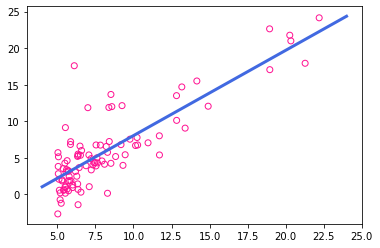

In [6]:
#Gradient descent settings
iterations = 1500
alpha = 0.01
Theta0 = np.array([0,0],dtype=float).reshape(2,1)
#theta = gradientDescent(X,Theta0,y,iterations,alpha)

theta, J_history = gradientDescent(X,Theta0,Y,iterations,alpha)

print(theta)    

def plotx(x,theta):
    return theta[0]+theta[1]*x

xx = np.linspace(4,24,1000)
plt.scatter(data['City population'],data['Profit of a food truck by city'],marker='o',facecolors='none', edgecolors='deeppink')
plt.plot(xx,plotx(xx,theta),color='royalblue',linewidth=3)

## Exercise 1.1, Part 3: Visualizing $J(\theta)$
To understand the cost function $J(\theta)$ better, you will now plot the cost over
a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. The purpose of these graphs is to show you that how $J(\theta)$ varies with
changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global
mininum. (This is easier to see in the contour plot than in the 3D surface
plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of
gradient descent moves closer to this point.

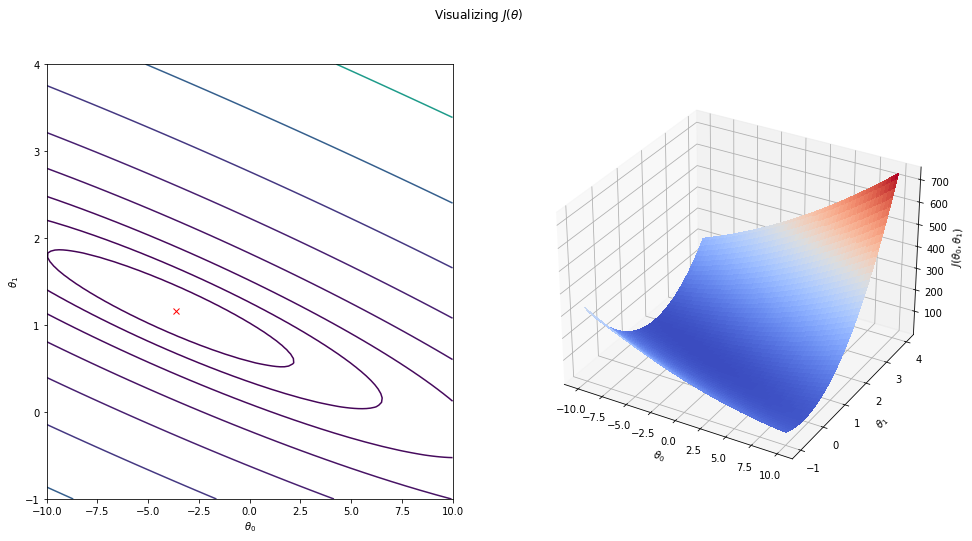

In [7]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(2,1)
        J_vals[i,j] = computeCost(X, t, Y)

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped

J_vals = np.transpose(J_vals)
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm



# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(16,8))
fig.suptitle(r"Visualizing $J(\theta)$")

# First subplot
ax = fig.add_subplot(1, 2, 1)

ax.contour(theta0,theta1,J_vals, levels=np.logspace(-2, 3, 20))
ax.plot(theta[0], theta[1], 'rx')
ax.set_xlabel(r"$\theta_0$"), ax.set_ylabel(r"$\theta_1$")

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(theta0, theta1, J_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.set_zlabel(r"$J(\theta_0,\theta_1)$")
plt.show()

# Exercise 1.2: Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices. 

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.


In [8]:
#DATA READ
data = np.loadtxt('data/ex1data2.txt',delimiter=',', dtype=float)
data = pd.DataFrame(data)
data.columns = [r"Size of the house $({\text{feet}}^2)$",'Number of bedrooms',r"Price of the house ($)"]
data['Number of bedrooms'] = data['Number of bedrooms'].astype(int)
data.head()

,Size of the house $({\text{feet}}^2)$,Number of bedrooms,Price of the house ($)
0,2104.0,3,399900.0
1,1600.0,3,329900.0
2,2400.0,3,369000.0
3,1416.0,2,232000.0
4,3000.0,4,539900.0


## Exercise 1.2, Part 1: Feature normalization

By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge
much more quickly.

Your task here is to build the **featureNormalize** function such that it:

• Subtracts the mean value of each feature from the dataset.

• After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations."

The standard deviation is a way of measuring how much variation there is
in the range of values of a particular feature (most data points will lie within
±2 standard deviations of the mean); this is an alternative to taking the range
of values (max-min).

You will do this for all the features and your code should work with
datasets of all sizes (any number of features / examples). Note that each
column of the matrix X corresponds to one feature.

**Implementation Note**: When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

In [9]:
def featureNormalize(X):
    mu = np.mean(X)
    std = np.std(X)
    return ((X-mu)/std), mu, std

X = data[[r"Size of the house $({\text{feet}}^2)$",'Number of bedrooms']].to_numpy()
X = np.append(np.ones((X.shape[0],1)),X,axis=1) #Add a column of ones for the bias unit
print(X.shape)

Y = data[r"Price of the house ($)"].to_numpy()
print(Y.shape)

X[:,1], mu1, std1 = featureNormalize(X[:,1])
X[:,2], mu2, std2 = featureNormalize(X[:,2])

(47, 3)
(47,)


## Exercise 1.2, Part 2: Gradient Descent

Previously, you implemented gradient descent on a univariate regression
problem. The only difference now is that there is one more feature in the
matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged.

You should complete the code in **computeCostMulti** and **gradientDescentMulti**
to implement the cost function and gradient descent for linear regression with
multiple variables. If your code in the previous part (single variable) already
supports multiple variables, you can use it here too.


Make sure your code supports any number of features and is well-vectorized.


Theta computed from gradient descent:
[334302.06399328  99411.44947359   3267.01285407]


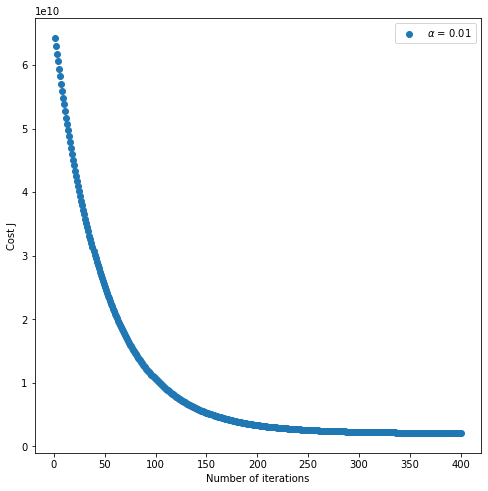

In [10]:
def computeCostMulti(Theta,X,y):
    m = len(y)
    return (.5/m) * np.sum(np.power(Theta.dot(X.T)-y,2))

def gradientDescentMulti(Theta,X,y,n_it,a):
    J_it = np.zeros(n_it,dtype=float)
    m = len(y)
    for i in range(n_it):
        Theta += -(a/m)*X.T.dot(Theta.dot(X.T)-y)
        J_it[i] = computeCostMulti(Theta,X,y)
    return Theta, J_it            

#Choose some alpha value
alpha = 0.01
num_iters = 400

#Init Theta and Run Gradient Descent 
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(theta, X, Y, num_iters,alpha)

#Plot the convergence graph
plt.figure(figsize=(8,8))
plt.scatter(np.linspace(1,num_iters,num_iters), J_history,label=r"$\alpha$ = "+str(alpha))
plt.xlabel('Number of iterations'), plt.ylabel('Cost J'), plt.legend()

#Display gradient descent's result
print('Theta computed from gradient descent:')
print(theta)

## Exercise 1.2, Part 3: Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate by modifying ex1 multi.m and changing the part of the
code that sets the learning rate.

If you picked a learning rate within a good range, your plot look similar to the previous Figure. If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).
You may also want to adjust the number of iterations you are running if that
will help you see the overall trend in the curve.

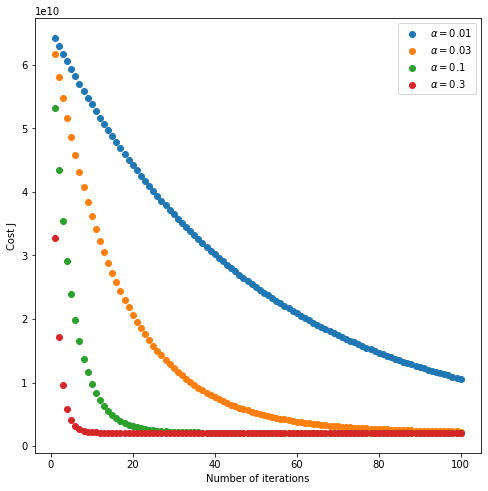

In [11]:
#Choose some alpha value
alphas = [0.01, 0.03, 0.1, 0.3]
num_iters = 100

#Init Theta
theta0 = np.zeros(3)

#Run Gradient Descent
plt.figure(figsize=(8,8))
plt.xlabel('Number of iterations'), plt.ylabel('Cost J')
for i in range(len(alphas)):
    throwaway, J_history = gradientDescentMulti(np.zeros(3), X, Y, num_iters,alphas[i])
    plt.scatter(np.linspace(1,num_iters,num_iters), J_history,label=r"$\alpha = $"+str(alphas[i]))
plt.legend()